**Standard Libraries**

In [2]:
import pandas as pd
import os
import numpy as np

**Read the One Hot Encoded CSV files**

In [7]:
import warnings
warnings.filterwarnings('ignore')

j = pd.read_csv('onehot_judicature.csv', index_col=[0])
b = pd.read_csv('onehot_federal.csv', index_col=[0])
l = pd.read_csv('onehot_state.csv', index_col=[0])

**Delete "not_used" Variables and rename the remaining Variables**

In [8]:
j = j[['Dokumenttyp_used','GZ_canonical_used','RechtssatznummerForZitat_used',
       'Rechtssatznummer_used','GZForZitat_used','Datum__From_used',
       'Datum__To_used','Veroeffentlichungsdatum_From_used',
       'Veroeffentlichungsdatum_To_used','Gericht_used','Norm_used',
       'Fundstelle_used','Search_Term_used']]
j.columns = ['Dokumenttyp','GZ_canonical','RechtssatznummerForZitat',
             'Rechtssatznummer','GZForZitat','Datum__From','Datum__To',
             'Veroeffentlichungsdatum_From','Veroeffentlichungsdatum_To',
             'Gericht','Norm','Fundstelle','Search_Term']

b = b[['Artikelnummer_From_used','Artikelnummer_To_used','Artikelbuchstabe_used',
       'Paragraphnummer_From_used','Paragraphnummer_To_used',
       'Paragraphbuchstabe_used','Titel_used','Gesetzesnummer_used',
       'StammnormPublikationsorgan_used','StammnormBgblnummer_used',
       'Inkrafttretedatum_From_used','Inkrafttretedatum_To_used',
       'Ausserkrafttretedatum_From_used','Ausserkrafttretedatum_To_used',
       'NovellenBgblnummer_used','Search_Term_used']]
b.columns = ['Artikelnummer_From','Artikelnummer_To','Artikelbuchstabe',
             'Paragraphnummer_From','Paragraphnummer_To','Paragraphbuchstabe',
             'Titel','Gesetzesnummer','StammnormPublikationsorgan',
             'StammnormBgblnummer','Inkrafttretedatum_From',
             'Inkrafttretedatum_To','Ausserkrafttretedatum_From',
             'Ausserkrafttretedatum_To','NovellenBgblnummer','Search_Term']

l = l[['Bundesland_used','Diskriminator_used','Landesnormen_Applikation_used',
       'Paragraphnummer_From_used','Paragraphnummer_To_used','Titel_used',
       'Gesetzesnummer_used','StammnormPublikationsorgan_used',
       'StammnormBgblnummer_used','Inkrafttretedatum_From_used',
       'Inkrafttretedatum_To_used','Ausserkrafttretedatum_From_used',
       'Ausserkrafttretedatum_To_used','Search_Term_used']]
l.columns = ['Bundesland','Diskriminator','Landesnormen_Applikation',
             'Paragraphnummer_From','Paragraphnummer_To','Titel',
             'Gesetzesnummer','StammnormPublikationsorgan','StammnormBgblnummer',
             'Inkrafttretedatum_From','Inkrafttretedatum_To',
             'Ausserkrafttretedatum_From','Ausserkrafttretedatum_To',
             'Search_Term']

**K-Modes**

The data will be run through k-modes algorithm that uses modes of categorical attributes instead of the means in k-means for clustering of categorical data.

In [25]:
from kmodes.kmodes import KModes

data = l #state norms

km = KModes(n_clusters=3, init='Huang', verbose=1)

clusters = km.fit_predict(data)

labels = km.labels_
# Format results as a DataFrame
l_modes_r = pd.DataFrame([l.index,labels]).T

l_modes = l
l_modes_r.columns = ['Index', 'Cluster']
l_modes_r = l_modes_r['Cluster']
l_modes['Cluster'] = l_modes_r

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 19784, cost: 83343.0
Run 1, iteration: 2/100, moves: 0, cost: 83343.0


In [26]:
l_modes.head()

,Bundesland,Diskriminator,Landesnormen_Applikation,Paragraphnummer_From,Paragraphnummer_To,Titel,Gesetzesnummer,StammnormPublikationsorgan,StammnormBgblnummer,Inkrafttretedatum_From,Inkrafttretedatum_To,Ausserkrafttretedatum_From,Ausserkrafttretedatum_To,Search_Term,Cluster
0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1


In [27]:
data = b #federal norms

km = KModes(n_clusters=3, init='Huang', verbose=1)

clusters = km.fit_predict(data)

labels = km.labels_
# Format results as a DataFrame
b_modes_r = pd.DataFrame([b.index,labels]).T

b_modes = b
b_modes_r.columns = ['Index', 'Cluster']
b_modes_r = b_modes_r['Cluster']
b_modes['Cluster'] = b_modes_r

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 108065, cost: 529385.0
Run 1, iteration: 2/100, moves: 0, cost: 529385.0


In [28]:
b_modes.head()

,Artikelnummer_From,Artikelnummer_To,Artikelbuchstabe,Paragraphnummer_From,Paragraphnummer_To,Paragraphbuchstabe,Titel,Gesetzesnummer,StammnormPublikationsorgan,StammnormBgblnummer,Inkrafttretedatum_From,Inkrafttretedatum_To,Ausserkrafttretedatum_From,Ausserkrafttretedatum_To,NovellenBgblnummer,Search_Term,Cluster
0,0,0,0,1,1,1,1,0,0,1,0,1,1,1,1,0,2
1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1
2,0,0,0,1,1,0,1,0,0,0,0,1,1,1,0,0,2
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0


In [1]:
#Needs to much time! >3h
#data = j #judiciary

#km = KModes(n_clusters=3, init='Huang', verbose=1)

#clusters = km.fit_predict(data)

#labels = km.labels_
# Format results as a DataFrame
#j_modes_r = pd.DataFrame([j.index,labels]).T

#j_modes = j
#j_modes_r.columns = ['Index', 'Cluster']
#j_modes_r = j_modes_r['Cluster']
#j_modes['Cluster'] = j_modes_r
#j_modes.head()

In [29]:
b_modes.to_csv('b_clust_mod.csv')
l_modes.to_csv('l_clust_mod.csv')
#j_modes.to_csv('j_clust_mod.csv')

In [10]:
import warnings
warnings.filterwarnings('ignore')

compare = pd.read_csv('l_clust_mod.csv', index_col=[0])
compare_b = pd.read_csv('b_clust_mod.csv', index_col=[0])
import seaborn as sns

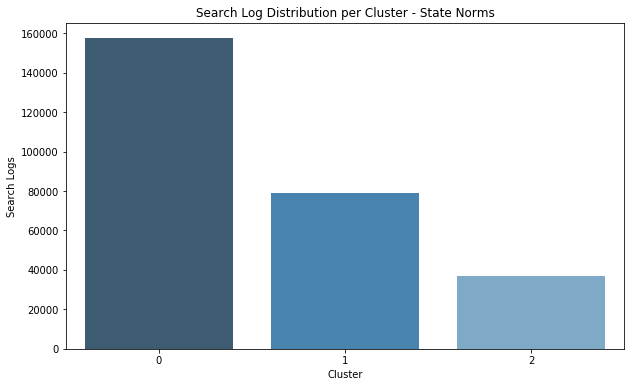

In [12]:
#State Norms
import matplotlib.pyplot as plt
new = pd.DataFrame()
new['Search Logs'] = compare.groupby(compare['Cluster']).size()
new['Cluster'] = compare.groupby(compare['Cluster']).size().index
plt.figure(figsize=(10,6))
sns.barplot("Cluster", "Search Logs", data=new, 
            palette="Blues_d").set_title(
            "Search Log Distribution per Cluster - State Norms")
plt.savefig("cluster_state_modes.png")

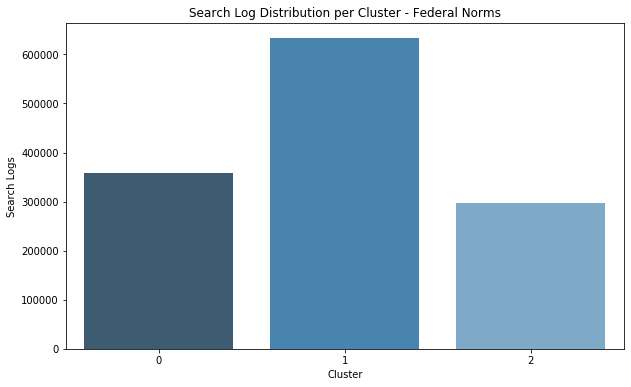

In [13]:
#Federal Norms
new_b = pd.DataFrame()
new_b['Search Logs'] = compare_b.groupby(compare_b['Cluster']).size()
new_b['Cluster'] = compare_b.groupby(compare_b['Cluster']).size().index
plt.figure(figsize=(10,6))
sns.barplot("Cluster", "Search Logs", data=new_b, 
            palette="Blues_d").set_title(
            "Search Log Distribution per Cluster - Federal Norms")
plt.savefig("cluster_federal_modes.png")

**KMeans**

By applying one-hot encoding, the data will be converted to numeric data and then it will be run through k-means.

**Judiciary**<br>
Optimal number of clusters (Elbow Method)<br>
KMeans

In [31]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(j)
    #j contains the Judiciary One Hot 
    Sum_of_squared_distances.append(km.inertia_)

<Figure size 640x480 with 1 Axes>

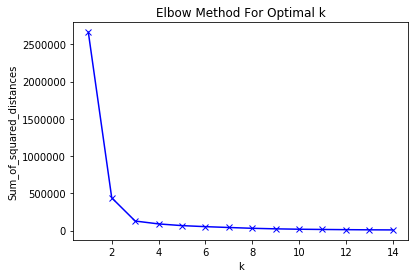

In [32]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [35]:
import sklearn
km = sklearn.cluster.KMeans(n_clusters=3)
km.fit(j)
# Get cluster assignment labels
labels = km.labels_
# Format results as a DataFrame
j_results = pd.DataFrame([j.index,labels]).T

**Federal Norms**<br>
Optimal number of clusters (Elbow Method)<br>
KMeans

In [36]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(b)
    Sum_of_squared_distances.append(km.inertia_)

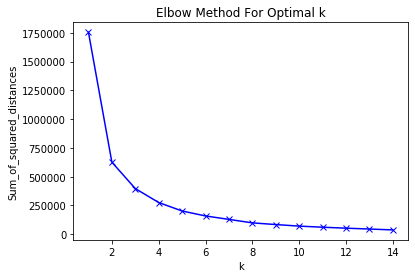

In [37]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [41]:
# Convert DataFrame to matrix
# Using sklearn
km = sklearn.cluster.KMeans(n_clusters=3)
km.fit(b)
# Get cluster assignment labels
labels = km.labels_
# Format results as a DataFrame
b_results = pd.DataFrame([b.index,labels]).T

**State Norms**<br>
Optimal number of clusters (Elbow Method)<br>
KMeans

In [39]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(l)
    Sum_of_squared_distances.append(km.inertia_)

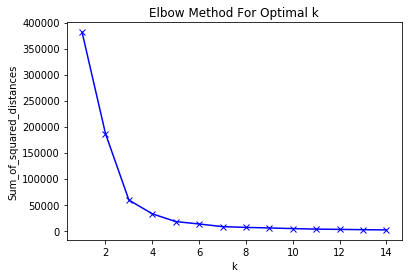

In [40]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [42]:
# Convert DataFrame to matrix
# Using sklearn
km = sklearn.cluster.KMeans(n_clusters=3)
km.fit(l)
# Get cluster assignment labels
labels = km.labels_
# Format results as a DataFrame
l_results = pd.DataFrame([l.index,labels]).T

**Distribution**

In [1]:
#Judiciary
j_results.columns = ['Index', 'Cluster']
j_df = pd.DataFrame()
j_df['Search Logs'] = j_results.groupby(j_results['Cluster']).size()
j_df['Cluster'] = j_results.groupby(j_results['Cluster']).size().index
plt.figure(figsize=(10,6))
sns.barplot("Cluster", "Search Logs", data=j_df, palette="Blues_d").set_title(
    "Search Log Distribution per Cluster - Judicature")
plt.savefig("cluster_judicature.png")

NameError: name 'j_results' is not defined

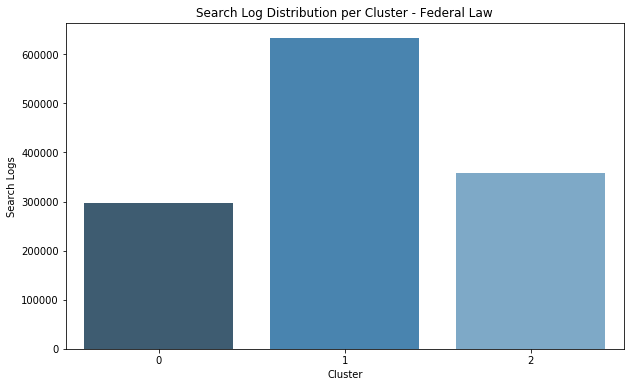

In [45]:
#Federal
b_results.columns = ['Index', 'Cluster']
b_df = pd.DataFrame()
b_df['Search Logs'] = b_results.groupby(b_results['Cluster']).size()
b_df['Cluster'] = b_results.groupby(b_results['Cluster']).size().index
plt.figure(figsize=(10,6))
sns.barplot("Cluster", "Search Logs", data=b_df, palette="Blues_d").set_title(
    "Search Log Distribution per Cluster - Federal Law")
plt.savefig("cluster_federal.png")

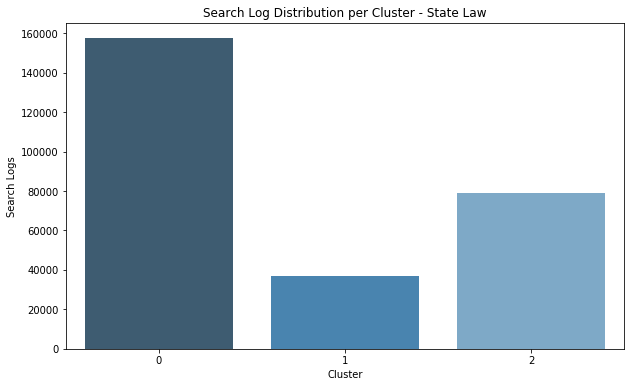

In [46]:
#State
l_results.columns = ['Index', 'Cluster']
l_df = pd.DataFrame()
l_df['Search Logs'] = l_results.groupby(l_results['Cluster']).size()
l_df['Cluster'] = l_results.groupby(l_results['Cluster']).size().index
plt.figure(figsize=(10,6))
sns.barplot("Cluster", "Search Logs", data=l_df, palette="Blues_d").set_title(
    "Search Log Distribution per Cluster - State Law")
plt.savefig("cluster_state.png")

**Safe the clusters as a new column in the Data Frames**

In [47]:
j['Cluster'] = j_results['Cluster']
b['Cluster'] = b_results['Cluster']
l['Cluster'] = l_results['Cluster']

**Distribution in numbers**

In [4]:
#Judicature
j.groupby(j['Cluster']).size()

Cluster
0    2095635
1    2482406
2     120798
dtype: int64

In [5]:
#Federal
b.groupby(b['Cluster']).size()

Cluster
0    297294
1    632858
2    358317
dtype: int64

In [7]:
#State Law
l.groupby(l['Cluster']).size()

Cluster
0    157515
1     37133
2     79054
dtype: int64

**Save it as CSV**

In [ ]:
j.to_csv('j_clust.csv')
b.to_csv('b_clust.csv')
l.to_csv('l_clust.csv')